# Energy Demand Forecasting using Weather Data: A Deep Learning Approach
-------------------
**Lakshmi Ravi Chandu Kolusu**

## **Project Overview:**

In this project, my focus is on forecasting energy demand by integrating weather data using deep learning techniques. I'll be working with hourly weather data to develop a robust predictive model capable of accurately predicting energy demand based on various weather parameters. To accomplish this, I've chosen to employ a deep learning architecture that combines recurrent and convolutional layers. By leveraging the temporal nature of weather data and implementing advanced feature engineering techniques, I aim to improve the model's predictive accuracy.

My approach involves several key steps. First, I'll sort and clean the dataset, ensuring that it's organized and free of any missing values. Then, I'll preprocess the data, transforming it into a suitable format for deep learning, such as a 3D tensor. This step is crucial for effectively capturing the temporal relationships within the data.

Next, I'll design and implement the deep learning architecture, carefully selecting the appropriate layers and activation functions to optimize model performance. Dropout regularization will also be applied to prevent overfitting and improve generalization.

Once the model is built, I'll conduct walk-forward validation experiments to evaluate its performance over time. This iterative process involves training the model on progressively larger subsets of the dataset and assessing its predictive accuracy at each step. Through this validation method, I'll be able to gauge how well the model adapts to new data and whether it demonstrates consistent improvement.

Ultimately, my goal is to deliver a reliable energy demand forecasting solution that can effectively support decision-making processes in energy management and resource allocation. By leveraging deep learning methodologies and integrating weather data, I aim to provide valuable insights that can inform strategic planning and optimization efforts in the energy sector.

## Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Importing RNN-specific modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,accuracy_score
from tensorflow import keras
from keras import layers, Sequential
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Dense, Dropout, SimpleRNN, GRU, LSTM, Bidirectional
from keras.callbacks import EarlyStopping

In [ ]:
# https://drive.google.com/file/d/1xYe3vCKTLeaJKpMDzv57ppCSWK_LCJ5V/view?usp=sharing
!gdown 1xYe3vCKTLeaJKpMDzv57ppCSWK_LCJ5V

Downloading...
From: https://drive.google.com/uc?id=1xYe3vCKTLeaJKpMDzv57ppCSWK_LCJ5V
To: /content/BDL_cleanweather_energy (1).csv
100% 7.38M/7.38M [00:00<00:00, 33.4MB/s]


In [ ]:
df = pd.read_csv('BDL_cleanweather_energy (1).csv')
df.head()

Datetime    Demand  BDL_tmpf  BDL_dwpf  BDL_relh  BDL_drct  \
0  2019-01-01 00:00:00  2713.617      37.9      37.9     100.0     360.0   
1  2019-01-01 01:00:00  2578.343      37.9      37.9     100.0     360.0   
2  2019-01-01 02:00:00  2467.969      37.9      37.9     100.0     340.0   
3  2019-01-01 03:00:00  2397.140      37.9      37.9     100.0     310.0   
4  2019-01-01 04:00:00  2381.258      37.9      37.9     100.0     140.0   

   BDL_sknt  BDL_p01i  BDL_alti  BDL_mslp  BDL_vsby  
0       4.0    0.0700     29.88    1009.7       5.0  
1       4.0    0.1100     29.79    1006.3       2.0  
2       7.0    0.0100     29.70    1003.3       2.0  
3       6.0    0.0100     29.63    1002.3       1.5  
4       3.0    0.0001     29.58    1001.2       1.5

### Data Types

In [ ]:
# Display information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96427 entries, 0 to 96426
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  96427 non-null  object 
 1   Demand    96427 non-null  float64
 2   BDL_tmpf  96160 non-null  float64
 3   BDL_dwpf  96160 non-null  float64
 4   BDL_relh  96160 non-null  float64
 5   BDL_drct  96160 non-null  float64
 6   BDL_sknt  96160 non-null  float64
 7   BDL_p01i  96160 non-null  float64
 8   BDL_alti  96160 non-null  float64
 9   BDL_mslp  96160 non-null  float64
 10  BDL_vsby  96160 non-null  float64
dtypes: float64(10), object(1)
memory usage: 8.1+ MB


* The dataset contains a total of 11 columns.

* The target variable for forecasting is the "Demand" column, which represents the energy demand.

* There is one datetime column named "Datetime" capturing the timestamps of the observations.

* The remaining nine columns are weather-related variables, denoted as "BDL_tmpf", "BDL_dwpf", "BDL_relh", "BDL_drct", "BDL_sknt", "BDL_p01i", "BDL_alti", "BDL_mslp", and "BDL_vsby".

* All columns in the dataset are numerical, except for the "Datetime" column, which is currently of object data type but should be converted to a datetime column for time-series analysis.

* The data also reveals that there are null values present in the climate variables, as indicated by the difference in non-null counts between the weather-related columns and total rows.

In [ ]:
# Converting the 'Datetime' column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.head()

Datetime    Demand  BDL_tmpf  BDL_dwpf  BDL_relh  BDL_drct  \
0 2019-01-01 00:00:00  2713.617      37.9      37.9     100.0     360.0   
1 2019-01-01 01:00:00  2578.343      37.9      37.9     100.0     360.0   
2 2019-01-01 02:00:00  2467.969      37.9      37.9     100.0     340.0   
3 2019-01-01 03:00:00  2397.140      37.9      37.9     100.0     310.0   
4 2019-01-01 04:00:00  2381.258      37.9      37.9     100.0     140.0   

   BDL_sknt  BDL_p01i  BDL_alti  BDL_mslp  BDL_vsby  
0       4.0    0.0700     29.88    1009.7       5.0  
1       4.0    0.1100     29.79    1006.3       2.0  
2       7.0    0.0100     29.70    1003.3       2.0  
3       6.0    0.0100     29.63    1002.3       1.5  
4       3.0    0.0001     29.58    1001.2       1.5

### Sorting the data (2011 - 2021) using Datetime column

In [ ]:
# Sorting the DataFrame by the 'Datetime' column and reset the index
df_sorted = df.sort_values(by='Datetime').reset_index(drop=True)
df_sorted

Datetime   Demand  BDL_tmpf  BDL_dwpf  BDL_relh  BDL_drct  \
0     2011-01-01 00:00:00  3053.00     33.98     26.96      0.00       0.0   
1     2011-01-01 01:00:00  2892.00     33.98     26.96      0.00       0.0   
2     2011-01-01 02:00:00  2774.00     30.92     26.96      0.00       0.0   
3     2011-01-01 03:00:00  2710.00     30.02     26.06      0.00       0.0   
4     2011-01-01 04:00:00  2698.00     28.94     24.98      0.00       0.0   
...                   ...      ...       ...       ...       ...       ...   
96422 2021-12-31 19:00:00  3310.60     48.00     45.00     89.29     190.0   
96423 2021-12-31 20:00:00  3148.00     48.00     46.00     92.74     190.0   
96424 2021-12-31 21:00:00  2988.93     48.00     46.00     92.74     170.0   
96425 2021-12-31 22:00:00  2793.70     46.90     46.40    100.00     180.0   
96426 2021-12-31 23:00:00  2629.35     48.00     46.00     92.74     160.0   

       BDL_sknt  BDL_p01i  BDL_alti  BDL_mslp  BDL_vsby  
0           0.0       0.0     30.07    1018.5       6.0  
1           0.0       0.0     30.07    1018.5       6.0  
2           0.0       0.0     30.07    1018.6       6.0  
3           0.0       0.0     30.09    1019.2       5.0  
4           0.0       0.0     30.09    1019.1       5.0  
...         ...       ...       ...       ...       ...  
96422       7.0       0.0     29.95    1014.2       6.0  
96423       5.0       0.0     29.95    1013.8       5.0  
96424       7.0       0.0     29.94    1013.5       5.0  
96425       7.0       0.0     29.94    1013.8       5.0  
96426       5.0       0.0     29.94    1013.3       4.0  

[96427 rows x 11 columns]

* The data needs to be verified to ensure it is arranged in chronological order from older to newer observations based on the datetime column, as it is time-series data. Maintaining this order is crucial for accurate analysis, especially in time-dependent forecasting tasks.

* Upon inspection, it was discovered that the dataset spans from the beginning of 2011 to the end of 2021, indicating a period of over ten years. Additionally, it is noted that the data is collected at hourly intervals, implying high-resolution temporal granularity suitable for detailed analysis and forecasting.

## EDA and wrangling

### Missing Values

In [ ]:
# Checking for missing values in the sorted DataFrame
df_sorted.isna().sum()

Datetime      0
Demand        0
BDL_tmpf    267
BDL_dwpf    267
BDL_relh    267
BDL_drct    267
BDL_sknt    267
BDL_p01i    267
BDL_alti    267
BDL_mslp    267
BDL_vsby    267
dtype: int64

* All weather-related variables, including 'BDL_tmpf', 'BDL_dwpf', 'BDL_relh', 'BDL_drct', 'BDL_sknt', 'BDL_p01i', 'BDL_alti', 'BDL_mslp', and 'BDL_vsby', exhibit an equal number of missing values, with 267 NaN entries in each column.

* The uniformity in the number of missing values across these weather variables suggests a possibility that entire rows containing these observations might be missing from the dataset, amounting to a total of 267 incomplete records.

In [ ]:
# Checking for total missing values in the sorted DataFrame including all columns
df_sorted.isna().sum().sum()

2403

* The total count of missing values in the sorted DataFrame, encompassing all columns, amounts to 2043, corresponding to the multiplication of 267 missing values by the 9 weather-related variables.

* To ascertain whether the missing values are uniformly distributed across the dataset or confined to specific rows, the indexes of the missing values will be extracted and counted.

* If the count of index values for missing entries equals 267, it suggests that all missing values are confined to the same 267 rows. This scenario could indicate a potential error in data collection or an oversight in entering the values of climate variables for these specific rows, particularly considering that the demand variable was not missing in these instances.

In [ ]:
# Identify missing values
missing_values = df_sorted[df_sorted.isnull().any(axis=1)]

# Fetching index values of missing values
missing_index_values = missing_values.index.values
print(len(missing_index_values))

# Printing the index values of missing values
print("Index values of missing values:", missing_index_values)

267
Index values of missing values: [   11   274   409   434   460   578   757  1170  1225  1328  1681  1682
  1683  1684  1685  1686  1687  1688  1689  1690  1691  1692  1693  1694
  1695  1696  1697  1698  1699  1700  1701  1702  1703  1704  1705  1722
  1788  1910  1934  2154  2448  2453  2536  2600  2603  2625  2695  2705
  2762  2821  2964  3000  3019  3045  3069  3081  3082  3213  3314  3359
  3383  3539  3554  3640  3649  3652  3698  3699  3700  3723  3724  3745
  3746  3752  3880  4028  4143  4150  4223  4295  4419  4789  5007  5010
  5032  5052  5057  5065  5194  5239  5298  5516  5984  5985  5993  5995
  6033  6299  6517  6557  6724  6846  7008  7009  7010  7011  7012  7013
  7014  7015  7016  7017  7018  7019  7020  7021  7022  7023  7024  7025
  7026  7027  7028  7029  7030  7031  7032  7033  7034  7035  7036  7037
  7038  7039  7040  7081  7125  7175  7179  7496  7512  7513  7514  7515
  7516  7517  7518  7519  7520  7521  7522  7523  7524  7525  7526  7527
  7528  7529  7

* The count of indexes corresponding to missing entries is 267, indicating that the entire 267 rows lack weather data. This observation suggests a systematic issue or omission in recording climate variables for these specific instances.

* To verify this finding, let us fetch the row with index 11 from the dataset to confirm the absence of weather-related information, further substantiating the presence of missing data in these records.

In [ ]:
df_sorted.iloc[11]

Datetime    2011-01-01 11:00:00
Demand                   3325.0
BDL_tmpf                    NaN
BDL_dwpf                    NaN
BDL_relh                    NaN
BDL_drct                    NaN
BDL_sknt                    NaN
BDL_p01i                    NaN
BDL_alti                    NaN
BDL_mslp                    NaN
BDL_vsby                    NaN
Name: 11, dtype: object

### Imputing missing values

In [ ]:
# Function to check if there are any missing values in a column
def has_missing_values_column(df, column):
    return df[column].isnull().any()

# Iterating over each column starting from the third column
for column in df_sorted.columns[2:]:
    # Continues loop if there are no missing values in the column
    if not has_missing_values_column(df_sorted, column):
        continue

    # Forward filling missing values in the column where the previous data point is available
    df_sorted[column] = df_sorted[column].fillna(method='ffill')

    # Backward filling missing values in the column where the next data point is available
    df_sorted[column] = df_sorted[column].fillna(method='bfill')

# Displaying the DataFrame with all missing values filled
print(df_sorted)


                 Datetime   Demand  BDL_tmpf  BDL_dwpf  BDL_relh  BDL_drct  \
0     2011-01-01 00:00:00  3053.00     33.98     26.96      0.00       0.0   
1     2011-01-01 01:00:00  2892.00     33.98     26.96      0.00       0.0   
2     2011-01-01 02:00:00  2774.00     30.92     26.96      0.00       0.0   
3     2011-01-01 03:00:00  2710.00     30.02     26.06      0.00       0.0   
4     2011-01-01 04:00:00  2698.00     28.94     24.98      0.00       0.0   
...                   ...      ...       ...       ...       ...       ...   
96422 2021-12-31 19:00:00  3310.60     48.00     45.00     89.29     190.0   
96423 2021-12-31 20:00:00  3148.00     48.00     46.00     92.74     190.0   
96424 2021-12-31 21:00:00  2988.93     48.00     46.00     92.74     170.0   
96425 2021-12-31 22:00:00  2793.70     46.90     46.40    100.00     180.0   
96426 2021-12-31 23:00:00  2629.35     48.00     46.00     92.74     160.0   

       BDL_sknt  BDL_p01i  BDL_alti  BDL_mslp  BDL_vsby  
0    

* In the context of this dataset containing hourly timeseries data, the method of forward-filling missing values with the preceding data point or backward-filling with the succeeding data point is a suitable approach.

* Given that the dataset comprises weather-related variables recorded hourly, it is reasonable to assume that weather conditions exhibit gradual changes over short time intervals. Therefore, filling missing values with adjacent data points in the chronological sequence helps maintain the temporal consistency of the dataset.

* By utilizing data points from nearby time intervals, this method ensures that the imputed values align closely with the observed weather patterns, reflecting the natural progression of climate conditions over time.

* In contrast to mean imputation, which calculates averages across the entire dataset and may be sensitive to outliers or extreme values, forward and backward filling directly leverages the contextual information from neighboring data points.

In [ ]:
# Checking for missing values after filling the missing values
df_sorted.isna().sum()

Datetime    0
Demand      0
BDL_tmpf    0
BDL_dwpf    0
BDL_relh    0
BDL_drct    0
BDL_sknt    0
BDL_p01i    0
BDL_alti    0
BDL_mslp    0
BDL_vsby    0
dtype: int64

All the missing values are imputed.

### Descriptive Statistics

In [ ]:
# Generating a statistical summary of data
df_sorted.describe()

Demand      BDL_tmpf      BDL_dwpf      BDL_relh      BDL_drct  \
count  96427.000000  96427.000000  96427.000000  96427.000000  96427.000000   
mean    3388.580129     51.950908     39.653514     65.614181    221.284391   
std      761.491626     19.309548     19.689528     21.411280    118.619243   
min     1372.000000    -11.020000    -27.040000      0.000000      0.000000   
25%     2843.000000     36.000000     24.980000     49.500000    170.000000   
50%     3333.420000     52.000000     41.000000     66.650000    230.000000   
75%     3813.000000     68.000000     55.940000     84.460000    330.000000   
max     7219.000000    102.020000     78.080000    100.000000    360.000000   

           BDL_sknt     BDL_p01i      BDL_alti      BDL_mslp      BDL_vsby  
count  96427.000000  96427.00000  96427.000000  96427.000000  96427.000000  
mean       7.562021      0.00553     30.017906   1009.986335      9.338270  
std        4.769616      0.03710      0.290478     80.922661      1.981883  
min        0.000000      0.00000      0.000000      0.000000      0.000000  
25%        4.000000      0.00000     29.870000   1011.100000     10.000000  
50%        7.000000      0.00000     30.020000   1016.300000     10.000000  
75%       10.000000      0.00000     30.170000   1021.500000     10.000000  
max       40.000000      1.96000     30.850000   1044.700000     10.000000

The mean and median values of all variables are relatively close to each other, indicating that the data is not heavily skewed and is approximately normally distributed.

### Distribution of Data

In [ ]:
# plot histograms for numerical features to analyze the feature distribution
# use plotly express to plot histogram
import plotly.express as px

# create temp dataset with only numerical fields
df_num = df_sorted.select_dtypes(include=['int', 'float'])

# iterate over columns to plot individual histograms
for i in df_num.columns:
    fig = px.histogram(df_num, x=i, height=300, width=700)
    fig.show()

* The histograms of the variables also indicate that their distributions are not highly skewed, suggesting that the data follows a relatively normal pattern.

* The absence of significant skewness in the distributions suggests that further exploration of outliers may not be necessary, as the data is likely to be representative of the underlying patterns without extreme deviations.

### Target Variable Rearrangement for RNN Modeling

In [ ]:
# Moving the 'Demand' column to the last position
df_sorted = df_sorted[[col for col in df_sorted if col != 'Demand'] + ['Demand']]
df_sorted.head()

Datetime  BDL_tmpf  BDL_dwpf  BDL_relh  BDL_drct  BDL_sknt  \
0 2011-01-01 00:00:00     33.98     26.96       0.0       0.0       0.0   
1 2011-01-01 01:00:00     33.98     26.96       0.0       0.0       0.0   
2 2011-01-01 02:00:00     30.92     26.96       0.0       0.0       0.0   
3 2011-01-01 03:00:00     30.02     26.06       0.0       0.0       0.0   
4 2011-01-01 04:00:00     28.94     24.98       0.0       0.0       0.0   

   BDL_p01i  BDL_alti  BDL_mslp  BDL_vsby  Demand  
0       0.0     30.07    1018.5       6.0  3053.0  
1       0.0     30.07    1018.5       6.0  2892.0  
2       0.0     30.07    1018.6       6.0  2774.0  
3       0.0     30.09    1019.2       5.0  2710.0  
4       0.0     30.09    1019.1       5.0  2698.0

### Timeseries plot of target (Demand)

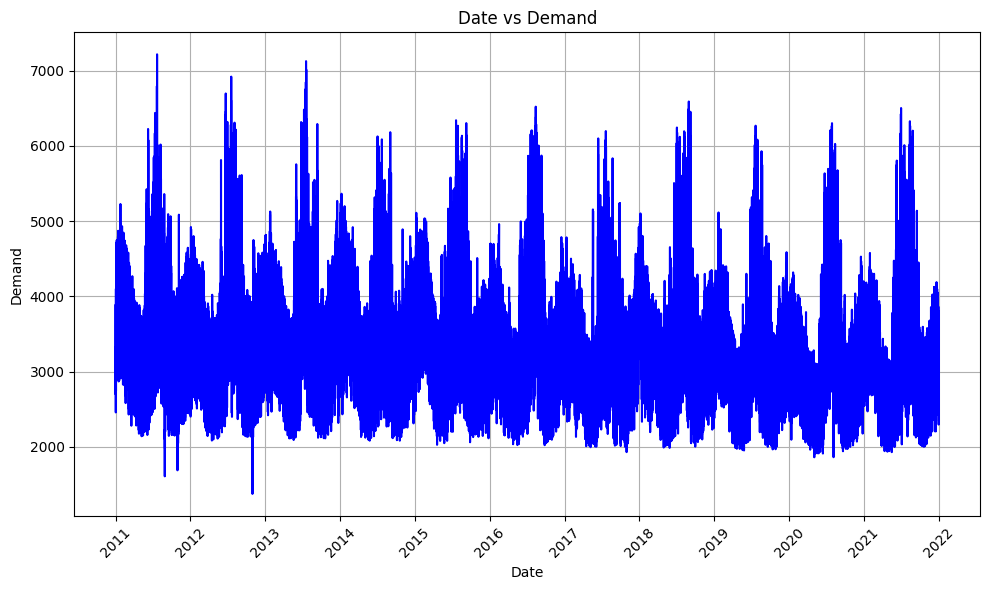

In [ ]:
from matplotlib.dates import DateFormatter, YearLocator

# Plotting Date vs Demand
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['Datetime'], df_sorted['Demand'], color='blue', linestyle='-')
plt.title('Date vs Demand')
plt.xlabel('Date')
plt.ylabel('Demand')

# Setting major ticks to be at the beginning of each year
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


* Each year from 2011 to 2021 exhibits a recurring pattern in energy demand, suggesting the presence of seasonality within the dataset. This recurring pattern indicates that certain factors, likely influenced by external variables i.e weather conditions throughout the year.

* The timeseries plot reveals distinct patterns in energy demand throughout the year, with peak demand occurring consistently between the months of May to July, reaching around 6000 kWh, and lower demand observed between February to April, averaging around 2000 kWh.

- Additionally, minor peaks are evident around the months of November to January, with demand surpassing 4000 kWh, indicating increased energy consumption during the colder months.
- The observed seasonal variations in energy demand can be attributed to several factors. The higher demand during the summer months (May to July) could be attributed to increased use of air conditioning systems to combat rising temperatures, leading to higher energy consumption for cooling purposes.
- Conversely, the lower demand during the cooler months (November to January) may be due to reduced reliance on heating systems as temperatures moderate, resulting in decreased energy usage for heating purposes.
- To validate these hypotheses and understand the impact of weather variables, particularly temperature, on energy demand, further analysis could involve plotting scatter plots between weather variables (such as temperature) and energy demand. This analysis would help elucidate the relationship between temperature fluctuations and energy consumption, confirming the observed seasonal trends.
- Overall, the seasonal variations in energy demand suggest a strong correlation with weather patterns, highlighting the importance of considering climatic factors in energy demand forecasting and management strategies.

### Scatter plots of Climate Variables vs Demand

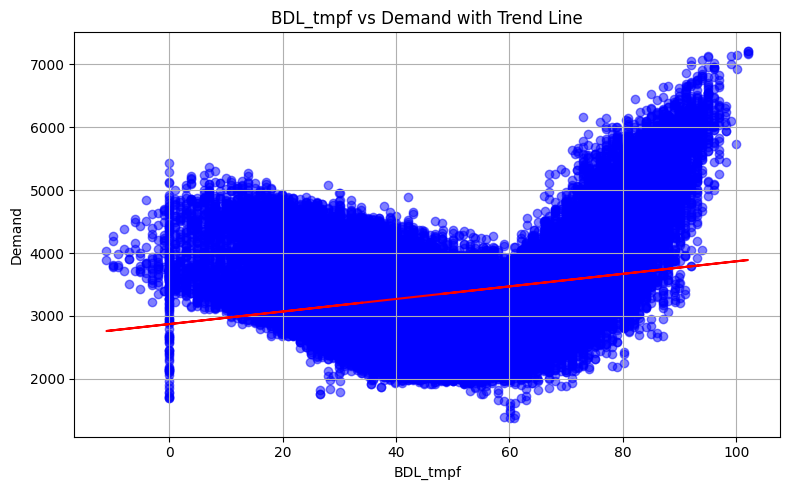

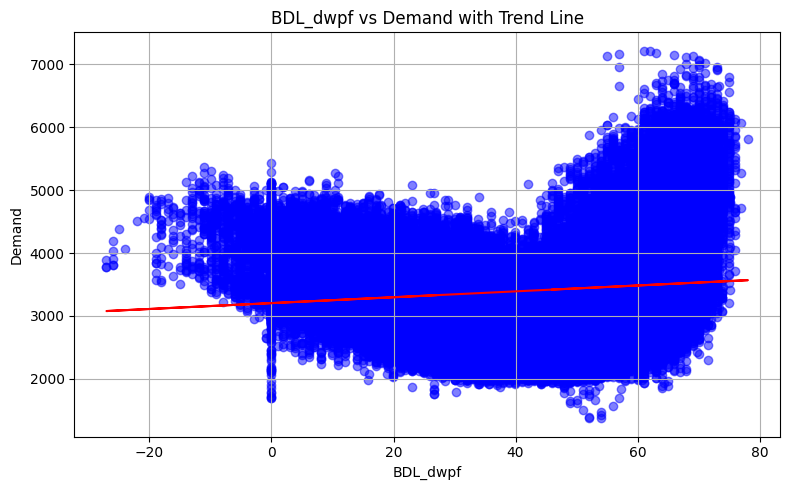

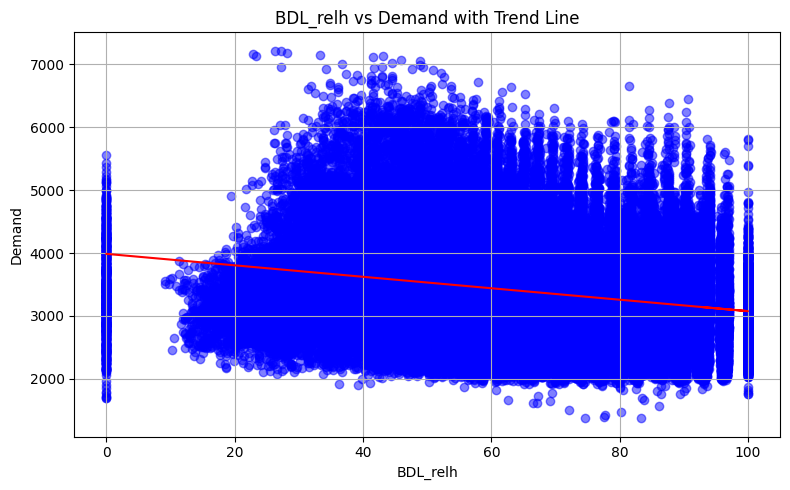

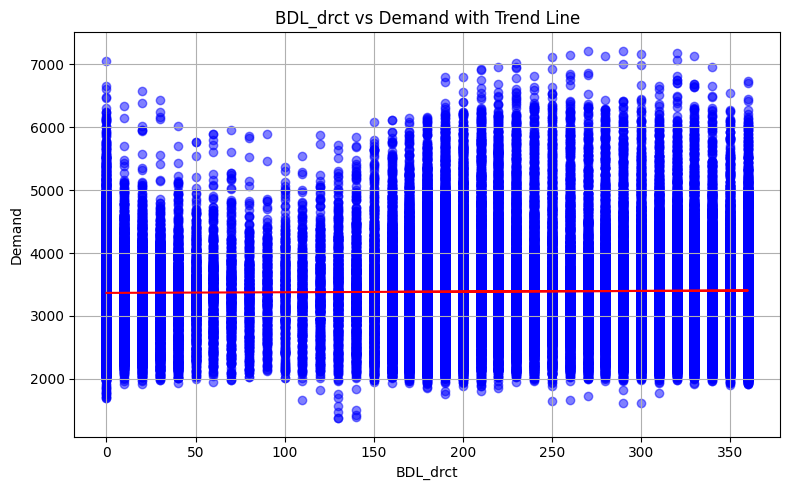

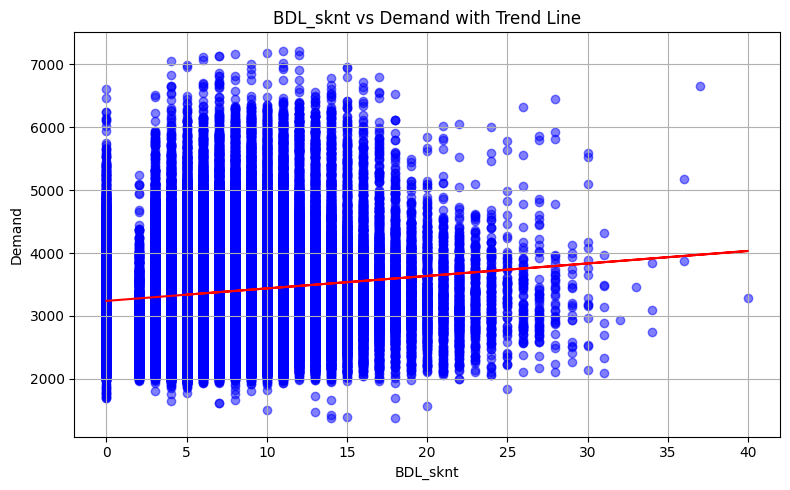

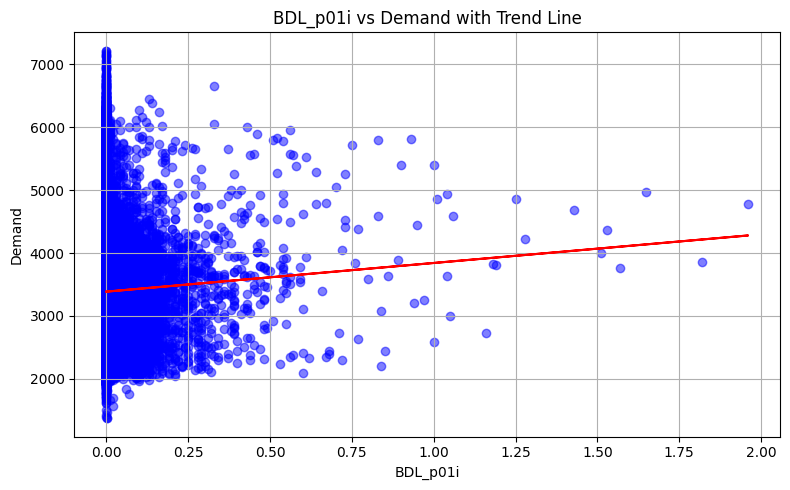

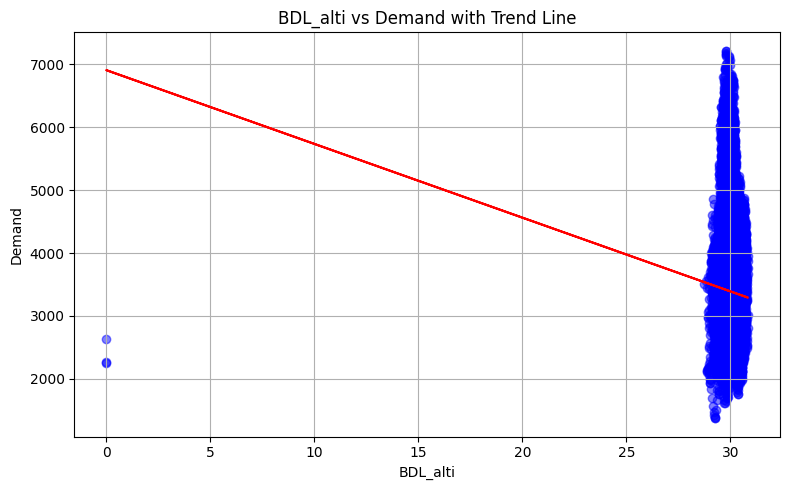

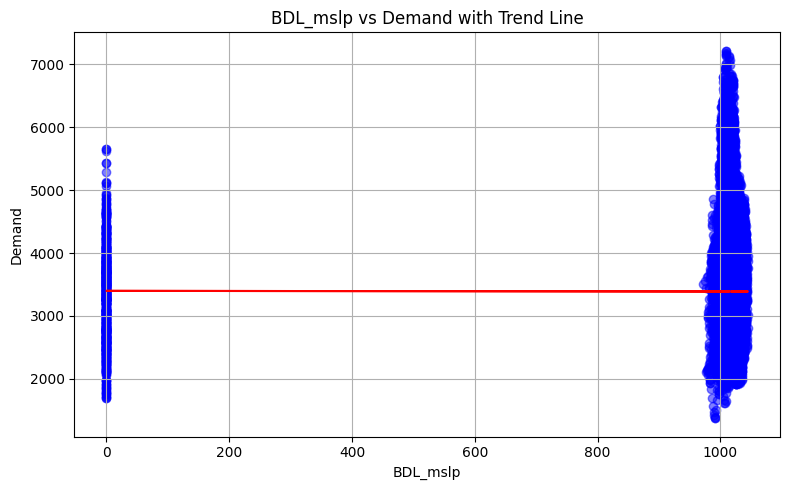

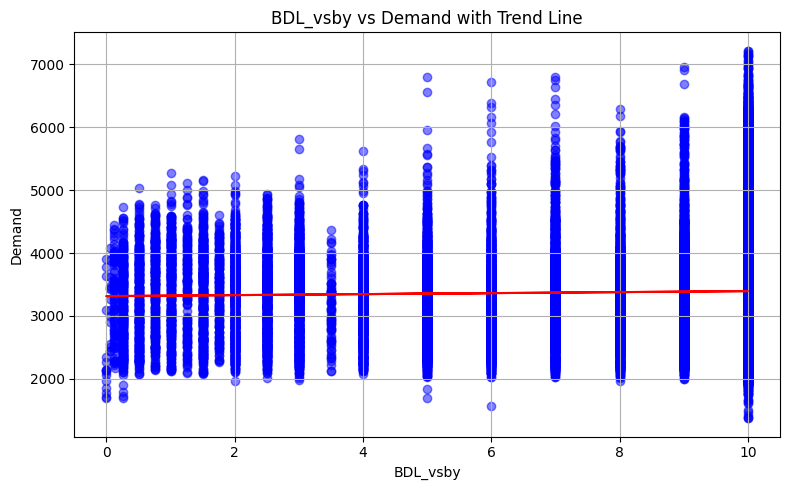

In [ ]:
from sklearn.linear_model import LinearRegression

# retrieving column names except 'Datetime' and 'Demand'
columns_to_plot = [col for col in df_sorted.columns if col not in ['Datetime', 'Demand']]

# Plotting scatter plots for each column against 'Demand' with a trend line
for column in columns_to_plot:
    # Create scatter plot
    plt.figure(figsize=(8, 5))
    plt.scatter(df_sorted[column], df_sorted['Demand'], color='blue', alpha=0.5)
    plt.title(f'{column} vs Demand with Trend Line')
    plt.xlabel(column)
    plt.ylabel('Demand')
    plt.grid(True)

    # Fitting linear regression model
    X = df_sorted[column].values.reshape(-1, 1)
    y = df_sorted['Demand'].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)

    # Plotting trend line
    plt.plot(X, model.predict(X), color='red')

    plt.tight_layout()
    plt.show()


* Temperature (TMPF): There is a clear positive correlation between temperature and energy demand, indicating that as temperatures rise, energy demand tends to increase. This suggests that higher temperatures prompt greater usage of cooling systems, leading to higher energy consumption.

* Relative Humidity (RELH): There is an inverse relationship between relative humidity and energy demand, with demand decreasing as humidity levels increase. This could be due to reduced reliance on heating systems in humid conditions, leading to lower energy usage for heating purposes.

* Dew Point (DWPF): Energy demand shows a positive correlation with dew point, indicating that as dew point increases, energy demand tends to rise. Higher dew points may necessitate increased cooling efforts, resulting in higher energy consumption.

* Wind Speed (SKNT) and Precipitation (P0li): Both wind speed and precipitation exhibit an increasing trend with energy demand, suggesting that adverse weather conditions such as high wind speeds or precipitation may drive up energy usage, potentially due to increased reliance on heating or cooling systems to maintain indoor comfort levels.

* Direction (DRCT): There appears to be no discernible trend or response of energy demand to wind direction, indicating that wind direction may not significantly impact energy consumption patterns.

* Mean Sea Level Pressure (MSLP) and Visibility (VSBY): Energy demand does not vary significantly with mean sea level pressure or visibility, suggesting that these weather variables may have minimal influence on energy consumption patterns.

Overall, the analysis of scatter plots reveals how energy demand varies in response to different weather variables, providing insights into the complex relationship between weather conditions and energy consumption patterns.

### Correlation Matrix

In [ ]:
# Plotting correlation (spearman) matrix for all feature variables and the target variable
import plotly.io as pio

pio.templates.default = "plotly_white"

corr = df_sorted.corr().round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))

fig = px.imshow(corr.mask(mask),
                color_continuous_scale = 'rdylbu',
                range_color=[-1,1],
                text_auto = True,
                height=600, width=800)

fig = fig.update_xaxes(tickangle=315, showgrid=False, zeroline=False)
fig = fig.update_yaxes(showgrid=False, zeroline=False)

fig.show()

<ipython-input-15-8aa62cb0c36b>:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



* Energy demand (demand) exhibits weak positive correlations with temperature (TMPF) and dew point (DWPF), with correlation coefficients of 0.25 and 0.12, respectively. This suggests that higher temperatures and dew points are associated with slightly higher energy demand, albeit the correlations are relatively weak.

* Additionally, there is a weak negative correlation of -0.26 between energy demand and relative humidity (RELH). This indicates that higher relative humidity levels are associated with slightly lower energy demand, though the relationship is not very strong.

* Other weather variables, including wind speed (SKNT), do not show significant correlations with energy demand, as indicated by correlation coefficients close to zero. This suggests that these variables may have limited direct influence on energy consumption patterns.

* The strong positive correlation of 0.89 between temperature (TMPF) and dew point (DWPF) indicates multicollinearity, which can potentially affect the accuracy and stability of regression models.

### Final Dataset (eliminating multicollinearity)  

In [ ]:
#dropping variables
df_final = df_sorted.drop(['Datetime', 'BDL_dwpf', 'BDL_mslp', 'BDL_drct'], axis=1)
print(df_final.shape)

(96427, 7)


* Due to its higher correlation coefficient with energy demand compared to dew point (DWPF), temperature (TMPF) is retained in the dataset while dew point (DWPF) is dropped to mitigate multicollinearity issues.

* Similarly, variables such as mean sea level pressure (MSLP) and wind direction (DRCT) are removed from the dataset due to their lack of influence on energy demand, as indicated by scatter plots with regression lines and negligible correlation coefficients.

* The removal of these variables aims to evaluate the impact of feature selection on the performance of the chosen RNN architecture, providing insights into whether the model's predictive capabilities improve or worsen without these features.

In [ ]:
df_final.head()

BDL_tmpf  BDL_relh  BDL_sknt  BDL_p01i  BDL_alti  BDL_vsby  Demand
0     33.98       0.0       0.0       0.0     30.07       6.0  3053.0
1     33.98       0.0       0.0       0.0     30.07       6.0  2892.0
2     30.92       0.0       0.0       0.0     30.07       6.0  2774.0
3     30.02       0.0       0.0       0.0     30.09       5.0  2710.0
4     28.94       0.0       0.0       0.0     30.09       5.0  2698.0

The final dataset has a total of 7 varibales: 6 X-varibales and 1 y-variable which is to be predicted.

## Processing data as 3D tensor

In [ ]:
# preparing the multivariate data for modeling

from numpy import array

# splitting the multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in np.arange(len(sequences)): # be careful of this line!
		# finding the end of this pattern
		end_ix = i + n_steps
		# checking if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gathering input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
# defining the look back period
n_steps = 24

#storing the data as a numpy array for modelling
raw_seq = np.array(df_final)

# splitting the weather data as X and the demand to be forecasted as y
X, y = split_sequences(raw_seq, n_steps)

In [ ]:
# Confirming for the shape of X and y to 6 variables in X and 1 in y
print(X.shape)
print(y.shape)

(96404, 24, 6)
(96404,)


## Model 01: first 50k samples predict the remaining ~46k samples

### Data Partitioning

In [ ]:
# splitting the data into train and test partitions
# using the first 50k rows of the data for training the rnn model, and remaining for test data
train_pct_index = 50000
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

# this didn't do any shuffling (to prevent temporal leakage and keep time series intact)

In [ ]:
# confirming the shape of train and test data
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(96404, 24, 6) (50000, 24, 6) (46404, 24, 6)
(96404,) (50000,) (46404,)


In [ ]:
n_steps = X_train.shape[1] # lookback
n_features = X_train.shape[2] # columns

print(n_steps, n_features)

24 6


### RNN Modelling

In [ ]:
# Defining the model
model = Sequential()

# Adding first Convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, input_shape=(n_steps, n_features)))
model.add(MaxPooling1D())

# Adding second Convolutional layer
model.add(Conv1D(filters=32, kernel_size=3))
model.add(MaxPooling1D())

# Adding Bidirectional LSTM layers with recurrent dropout
model.add(Bidirectional(LSTM(32, return_sequences=True, activation='relu', recurrent_dropout=0.2)))

# Adding GRU layer
model.add(GRU(20, activation='relu'))

# Adding a Dropout layer between Dense layers
model.add(Dropout(0.1))

# Adding Dense output layer
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compiling model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# printing model summary to check output shape and total parameters
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 22, 64)            1216      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 11, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 9, 32)             6176      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 4, 32)             0         
 g1D)                                                            
                                                                 
 bidirectional_1 (Bidirecti  (None, 4, 64)             16640     
 onal)                                                           
                                                      

In [ ]:
# defining early stopping callback

es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=10, # stops training after 10 epochs if no significant improvement
                                   restore_best_weights=True) # returning the best weigths before those 10 epochs


### Fitting the RNN Model

In [ ]:
# fitting the model (uses early stopping)
model.fit(X_train, y_train,
          epochs=600,
          batch_size=32,
          validation_split=0.2, # validation is a random 20% of the train data as shuffle = True
          verbose=1,
          callbacks=[es],
          shuffle=True)

Epoch 1/600
1250/1250 [==============================] - 24s 13ms/step - loss: 1300546.5000 - mae: 848.0427 - val_loss: 635499.7500 - val_mae: 631.0256
Epoch 2/600
1250/1250 [==============================] - 15s 12ms/step - loss: 756412.1875 - mae: 680.9039 - val_loss: 626832.3750 - val_mae: 631.5333
Epoch 3/600
1250/1250 [==============================] - 16s 13ms/step - loss: 716594.3750 - mae: 662.7302 - val_loss: 502384.0625 - val_mae: 533.0415
Epoch 4/600
1250/1250 [==============================] - 15s 12ms/step - loss: 555967.3750 - mae: 582.1929 - val_loss: 223012.2500 - val_mae: 365.7263
Epoch 5/600
1250/1250 [==============================] - 15s 12ms/step - loss: 421872.2188 - mae: 509.0562 - val_loss: 201407.9375 - val_mae: 360.6616
Epoch 6/600
1250/1250 [==============================] - 15s 12ms/step - loss: 391946.9375 - mae: 490.7642 - val_loss: 143942.6094 - val_mae: 300.9300
Epoch 7/600
1250/1250 [==============================] - 15s 12ms/step - loss: 412852.7500 - 

### Model Evaluation

#### Regression Metrics

In [ ]:
# predicting the test data using the rnn model built
pred = model.predict(X_test)

# calculating the regression metrics
from sklearn.metrics import  mean_absolute_error, mean_absolute_percentage_error, r2_score

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred)
print('MAE:', mae)
print()

# Calculating Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, pred)
print('MAPE:', mape)
print()

# Calculating Coefficient of Determination (R-squared)
r_squared = r2_score(y_test, pred)
print('R-squared:', r_squared)

1451/1451 [==============================] - 7s 4ms/step
MAE: 278.77644566872516

MAPE: 0.09226572438786347

R-squared: 0.746543222307759


- Mean Absolute Error (MAE) of 278.78 indicates that, on average, the model's predictions deviate by approximately 278.78 units from the actual energy demand values. Lower MAE values suggest better accuracy, indicating that the model's predictions are relatively close to the true values.

- The MAE of 278.78, when compared to the mean demand value of 3388.58, reveals that the model's predictions deviate by a relatively lower amount than simply predicting the average demand value. This suggests that the model's predictions are providing meaningful insights beyond what could be achieved by naively predicting the average demand for all instances.

- Mean Absolute Percentage Error (MAPE) of 0.0923, indicates that on an average, the model's predictions have a relative error of around 9.23% compared to the actual energy demand values. So the current rnn model trained on 50k samples is 90.77% accurate.

- R-squared value of 0.747 indicates that approximately 74.7% of the variance in the energy demand can be explained by the independent variables included in the model. This indicates a moderately good fit of the model to the observed data.

- Overall, the model's performance appears promising, with relatively low MAE and MAPE values indicating accurate predictions, and a moderately high R-squared value indicating a good fit of the model to the data just using only approximately 50% of the data for training.

#### Scatter Plot (Actual vs Predicted)

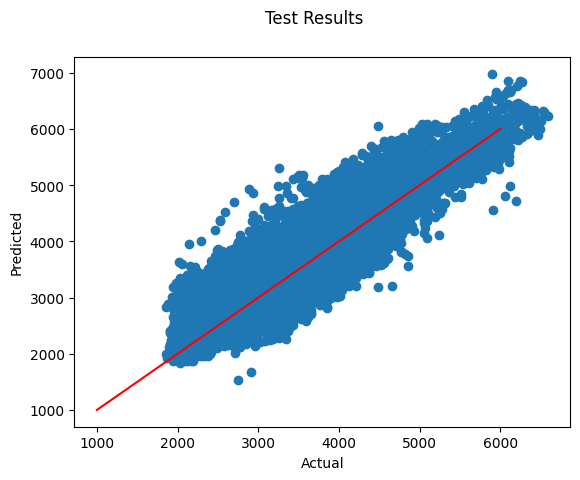

In [ ]:
# plotting actual vs. predicted demand values for test data
actual = y_test # the actual
plt.scatter(x=actual, y=pred)
x = np.linspace(1000,6000) # 45 degree line
plt.plot(x, x, color='red')
plt.suptitle('Test Results')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

* The scatter plot demonstrates a strong alignment of data points around the 45-degree regression line, indicating a close correspondence between the actual and predicted values of the test data.

* While a few data points deviate slightly from the regression line, overall, the majority of observations cluster tightly around it, suggesting that the model's predictions are generally accurate and consistent.

* Overall, the scatter plot provides visual confirmation that the model's predictions align closely with the actual values, affirming the model's effectiveness in accurately estimating energy demand based on the provided weather features.

#### Timeseries Plot (Actual vs Predicted)

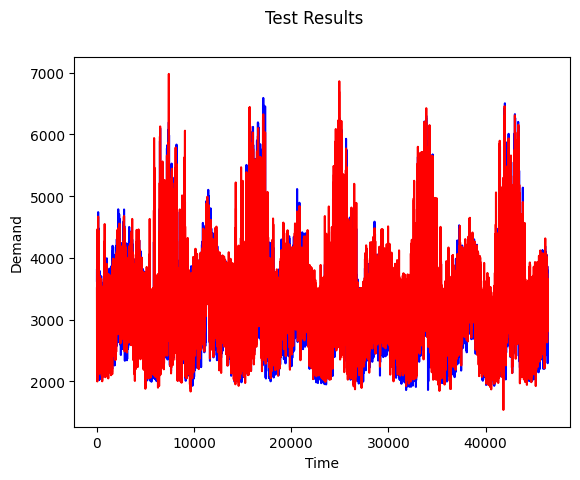

In [ ]:
# timeseries plot of test data (actual vs predicted)
plt.plot(np.arange(X_test.shape[0]), y_test, color='blue') # actual data
plt.plot(np.arange(X_test.shape[0]), pred, color='red') # predicted data
plt.suptitle('Test Results')
plt.xlabel('Time') #remaing 46k rows used for test
plt.ylabel('Demand')
plt.show()

* The timeseries plot illustrates a close alignment between the predicted (red lines) and actual (blue lines) energy demand values over time, indicating the model's ability to capture overall trends and seasonality effectively.

* While the predicted values closely track the actual values throughout most of the time series, deviations are observed during peak demand periods and low demand periods, where the red lines fall short of the blue lines for low demand periods and over predict for peak demand.

* This suggests that the model is struggling slightly to accurately predict extreme fluctuations in demand during these periods.

## Model 02: first 80k samples predict the remaining ~16k samples

### Hypothesis for Walk-forward Validation

Increasing the training samples from 50,000 to 80,000, while maintaining the existing RNN model architecture without any modifications to hyperparameters such as dropout rates and early stopping criteria, will lead to improvements in the model's ability to accurately predict energy demand, specifically addressing peak and low fluctuations, reducing scattered points away from the regression line, and decreasing the average error in predictions.

### Data Partitioning

In [ ]:
# splitting the data into train and test partitions
# using the first 80k rows of the data for training the rnn model, and remaining for test data
train_pct_index = 80000

#providing additional 30k rows to training model 02 when compared to model 01
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

In [ ]:
# verifying the shape and lookback period
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(96404, 24, 6) (80000, 24, 6) (16404, 24, 6)
(96404,) (80000,) (16404,)


In [ ]:
n_steps = X_train.shape[1] # lookback
n_features = X_train.shape[2] # columns

print(n_steps, n_features)

24 6


### RNN Model (same architecture as Model 01)

In [ ]:
# Defining model
model = Sequential()

# Adding first Convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, input_shape=(n_steps, n_features)))
model.add(MaxPooling1D())

# Adding second Convolutional layer
model.add(Conv1D(filters=32, kernel_size=3))
model.add(MaxPooling1D())

# Adding Bidirectional LSTM layers with recurrent dropout
model.add(Bidirectional(LSTM(32, return_sequences=True, activation='relu', recurrent_dropout=0.2)))

# Adding GRU layer
model.add(GRU(20, activation='relu'))

# Adding a Dropout layer between Dense layers
model.add(Dropout(0.1))

# Adding a Dense output layer
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compiling the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# printing model summary to check output shape and total parameters
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 22, 64)            1216      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 11, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 9, 32)             6176      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 4, 32)             0         
 g1D)                                                            
                                                                 
 bidirectional_2 (Bidirecti  (None, 4, 64)             16640     
 onal)                                                           
                                                      

In [ ]:
# defining early stopping callback
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=8,
                                   restore_best_weights=True)

### Fitting the RNN Model

In [ ]:
# fit model (uses early stopping)
model.fit(X_train, y_train,
          epochs=600,
          batch_size=32,
          validation_split=0.2, # val is a random 20% of the data since we set shuffle = True
          verbose=1,
          callbacks=[es],
          shuffle=True)

Epoch 1/600
2000/2000 [==============================] - 31s 13ms/step - loss: 1041086.8750 - mae: 773.1382 - val_loss: 512796.0000 - val_mae: 538.4193
Epoch 2/600
2000/2000 [==============================] - 24s 12ms/step - loss: 593873.3750 - mae: 603.6067 - val_loss: 259057.4062 - val_mae: 409.5081
Epoch 3/600
2000/2000 [==============================] - 24s 12ms/step - loss: 358209.0625 - mae: 469.3640 - val_loss: 180544.6406 - val_mae: 334.1799
Epoch 4/600
2000/2000 [==============================] - 24s 12ms/step - loss: 317123.9062 - mae: 442.4545 - val_loss: 127805.3672 - val_mae: 284.9691
Epoch 5/600
2000/2000 [==============================] - 26s 13ms/step - loss: 311353.1562 - mae: 438.4293 - val_loss: 167272.6094 - val_mae: 326.2868
Epoch 6/600
2000/2000 [==============================] - 25s 12ms/step - loss: 299854.7188 - mae: 428.7060 - val_loss: 146691.5469 - val_mae: 307.5834
Epoch 7/600
2000/2000 [==============================] - 25s 12ms/step - loss: 312892.4688 - 

### Model Evaluation

#### Regression Metrics

In [ ]:
# predicting the test data
pred = model.predict(X_test)# the pred

# calculating regression metrics for the model 02 with 80k rows used for training
from sklearn.metrics import  mean_absolute_error, mean_absolute_percentage_error, r2_score

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred)
print('MAE:', mae)
print()

# Calculating Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, pred)
print('MAPE:', mape)
print()

# Calculating Coefficient of Determination (R-squared)
r_squared = r2_score(y_test, pred)
print('R-squared:', r_squared)

513/513 [==============================] - 4s 5ms/step
MAE: 251.02631410242213

MAPE: 0.08587471818532431

R-squared: 0.8038583731250892


* Mean Absolute Error (MAE): The MAE of 251.03 suggests that, on average, the model's predictions deviate by approximately 251.03 units from the actual energy demand values. This represents a reduction in prediction error compared to Model 01, indicating improved accuracy in forecasting energy demand.

* Mean Absolute Percentage Error (MAPE): With a MAPE of 0.0859, the model exhibits a relative error of around 8.59% on average relative to the actual energy demand values. This indicates a further reduction in prediction error compared to Model 01, showcasing enhanced accuracy. The model trained on 80% of the data is approximately 91.41% accurate.

* R-squared Value: The R-squared value of 0.8039 signifies that approximately 80.39% of the variance in energy demand can be explained by the independent variables included in the model. This represents an improvement over Model 01, indicating a better fit of the model to the observed data.

#### Scatter Plot (Actual vs Predicted)

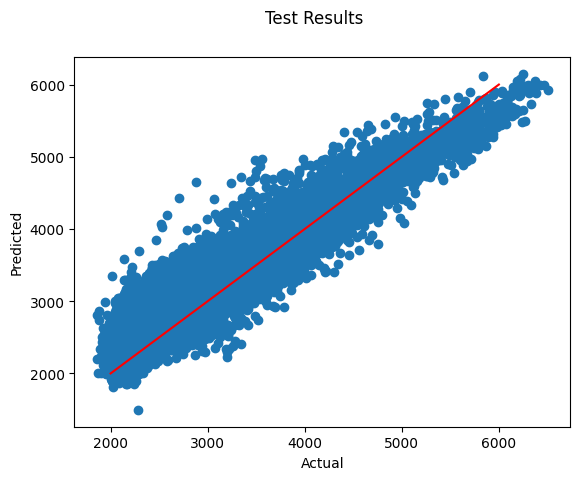

In [ ]:
# plotting actual vs. predicted demand values using model 02 for test data
actual = y_test # the actual
plt.scatter(x=actual, y=pred)
x = np.linspace(2000,6000) # 45 degree line
plt.plot(x, x, color='red')
plt.suptitle('Test Results')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

* Model 02 demonstrates a notable enhancement in accuracy and consistency, as evidenced by the tighter alignment of data points around the 45-degree regression line.

* The reduction in scattered points, particularly those below the regression line, indicates improved predictive performance and a better capture of underlying patterns and trends in the data.

* Overall, the tighter scatter plot for Model 02 reflects an enhanced ability to accurately estimate energy demand based on weather features, showcasing superior predictive capabilities compared to Model 01.

#### Timeseries Plot (Actual vs Predicted)

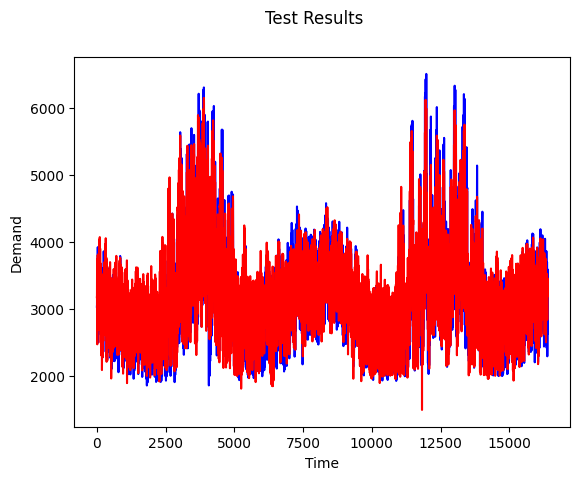

In [ ]:
# show timeseries plot on the train and validation data
plt.plot(np.arange(X_test.shape[0]), y_test, color='blue') # actual data
plt.plot(np.arange(X_test.shape[0]), pred, color='red') # predicted data
plt.suptitle('Test Results')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.show()

* The timeseries plot for Model 02 showcases a notable improvement in handling extreme fluctuations, particularly during peak demand periods, where the model no longer overpredicts but slightly underestimates the actual values.

* In contrast to Model 01, Model 02 demonstrates a closer alignment with actual values during low demand periods, indicating enhanced accuracy in capturing subtle variations in energy demand.

* Overall, the timeseries plot highlights Model 02's ability to mitigate overprediction during peak demand periods while maintaining a close correspondence with actual values across the entire time series, showcasing improved predictive performance.

## Result of Walk-forward validation Hypothesis

* The hypothesis that increasing the training samples from 50,000 to 80,000 would lead to improvements in the model's predictive performance was supported by the results.

* Walk forward validation of Model 02 demonstrated enhanced accuracy in capturing extreme fluctuations in energy demand, particularly during peak and low demand periods, indicating an improvement over Model 01.

* The increase in training data resulted in a reduction in scattered points away from the regression line, suggesting improved consistency and stability in the model's predictions across different demand scenarios.

* Additionally, the average error in predictions, as indicated by the Mean Absolute Error (MAE), decreased from 278.78 for Model 01 to 251.03 for Model 02, providing further evidence of the effectiveness of increasing the training samples in improving predictive accuracy.

* Furthermore, the R-squared ($R^2$) value for Model 02 increased from 0.747 in Model 01 to 0.804, signifying an improved fit of the model to the observed data and a better ability to explain the variance in energy demand based on the weather features.

Collectively, these metrics confirm that increasing the training samples from 50,000 to 80,000 led to notable enhancements in the model's predictive performance, aligning with the hypothesis of walk forward validation that a larger training dataset would yield improvements in accuracy and model generalization.

## Model 03: Baseline

### Persistence Model

In [ ]:
#  making a copy of the final dataset for baseline predictions
df_baseline = df_final.copy()

# Baseline model: The Persistence model (predicted demand values will be actual values shifted by 24 hours)
df_baseline['Baseline_Persistence'] = df_baseline['Demand'].shift(24)

# Extracting y_test_baseline_persistence for comparison
y_test_baseline_persistence = df_baseline['Baseline_Persistence'].tail(y_test.shape[0])

### Regression Metrics

In [ ]:
# Calculating Mean Absolute Error (MAE) for the baseline persistence model
mae_baseline_persistence = mean_absolute_error(y_test, y_test_baseline_persistence)
print('Baseline Persistence Model MAE:', mae_baseline_persistence)

# Calculating Mean Absolute Percentage Error (MAPE) for the baseline persistence model
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_baseline_persistence = mean_absolute_percentage_error(y_test, y_test_baseline_persistence)
print('Baseline Persistence Model MAPE:', mape_baseline_persistence)

# Calculating R-squared (R2) for the baseline persistence model
r2_baseline_persistence = r2_score(y_test, y_test_baseline_persistence)
print('Baseline Persistence Model R-squared:', r2_baseline_persistence)

Baseline Persistence Model MAE: 242.12189155084127
Baseline Persistence Model MAPE: 7.54170595173394
Baseline Persistence Model R-squared: 0.7729255581238592


* The Baseline Persistence Model achieves a Mean Absolute Error (MAE) of 242.12, indicating that, on average, its predictions deviate by approximately 242.12 units from the actual energy demand values.

* With a Mean Absolute Percentage Error (MAPE) of 7.54%, the model exhibits a relative error of around 7.54% compared to the actual demand values, suggesting a reasonable level of accuracy.

* The R-squared (R2) value for the Baseline Persistence Model is 0.773, implying that approximately 77.3% of the variance in the energy demand can be explained by simply shifting the actual demand values by 24 hours.

### Scatter Plot (Actual vs Predicted)

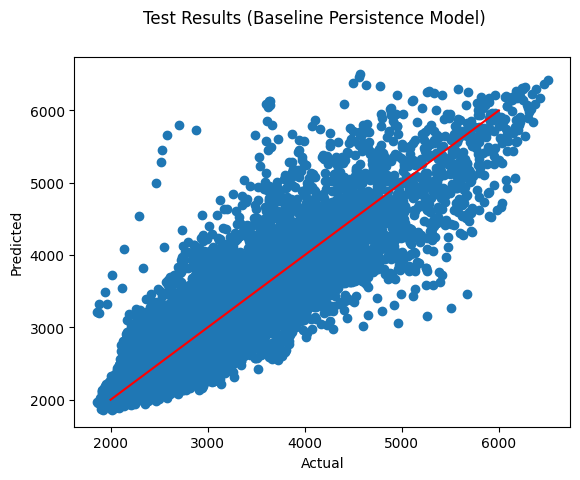

In [ ]:
# Scatterplot of actual vs. predicted for train and test (baseline persistence model)
plt.scatter(x=y_test, y=y_test_baseline_persistence)
plt.plot(x, x, color='red')  # 45-degree line
plt.suptitle('Test Results (Baseline Persistence Model)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

* The scatter plot of actual versus predicted demand values for the Baseline Persistence Model reveals a concerning trend where lower demand values appear to be somewhat tightly packed around the regression line, while higher demand values are more scattered, indicating greater variability and less accuracy in predicting peak demand periods.

### Timeseries Plot (Actual vs Predicted)

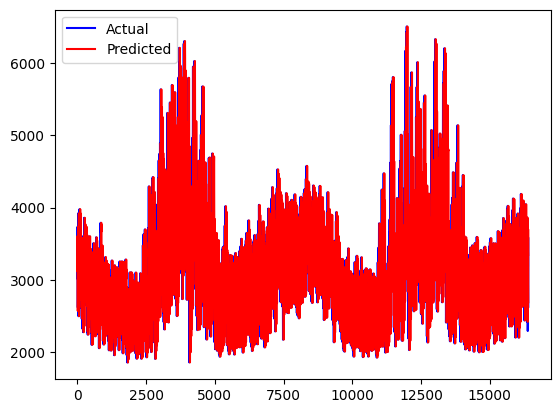

In [ ]:
# Timeseries plot on the train and validation data (baseline persistence model)
plt.plot(np.arange(y_test.shape[0]), y_test, color='blue', label='Actual')  # Actual data
plt.plot(np.arange(y_test.shape[0]), y_test_baseline_persistence, color='red', label='Predicted')  # Predicted data
plt.legend()
plt.show()

* Conversely, the timeseries plot depicts a more positive picture, showing a close alignment between the red predicted line and the blue actual line, indicating that the Baseline Persistence Model is generally effective in capturing the overall trend and seasonality of the energy demand data over time.

## Comparison of Baseline with RNN Model 02

* Model 02 outperforms the Baseline Persistence Model in terms of regression metrics, with higher R-squared value of 0.80 vs 0.77 for baseline model, indicating better model fit.

* Although the timeseries plot for the Baseline Persistence Model appears visually appealing, suggesting good alignment between predicted and actual demand values, the $R^2$ value and scatter plots reveal its limitations in accurately predicting energy demand, especially for higher demand values.

* The timeseries plot for the Baseline Persistence Model may look better than Model 02 due to its simplicity and direct prediction based solely on historical demand values, without considering other factors such as weather variables.

However, the RNN architecture used in Model 02 incorporates weather features, leading to better predictive performance overall.

## Conclusion



1.   Walk-forward validation successfully improved the predictive capabilities of Model 02 over Model 01. Specifically, Model 02, trained with 80,000 samples, demonstrated superior performance with a lower MAE of 251.03 and a higher R-squared value of 0.804 compared to Model 01, which had an MAE of 278.78 and an R-squared value of 0.747.

2. Additionally, scatter plots and timeseries plots revealed notable differences between Model 01 and Model 02. In Model 02, the scatter plots exhibited tighter clustering of data points around the regression line, indicating improved predictive accuracy and reduced variance. Similarly, the timeseries plots for Model 02 showed closer alignment between predicted and actual demand values, suggesting enhanced model performance in capturing underlying trends and patterns in the data.

3. Eliminating multicollinearity effects through feature selection significantly improved the predictive power of the RNN model. In Model (appendix section), where multicollinearity was present, the MAE was substantially higher at 290(80k samples for train) compared to 251(80k samples for train) for Model 02 and 278(50k samples for train) for Model 01. This indicates that the model with multicollinear features performed worse than Model 01, even though it was trained with 80,000 samples compared to Model 01's 50,000 samples.

4. Furthermore, scatter plots for the multicollinear model exhibited a lack of tightness, with some data points distributed away from the regression line, indicating reduced predictive accuracy. Additionally, the timeseries plot did not effectively capture peak and low demand periods, further highlighting the limitations of the model with multicollinear features.

5. In future endeavors, I would focus on conducting more extensive feature engineering and exploring feature importance to further refine the data and enhance predictive power. By identifying and selecting the most relevant features, we can improve the model's ability to capture important patterns and relationships in the data.

6. Additionally, I would consider experimenting with more complex RNN model architectures, incorporating additional layers, dropouts, and other techniques to enhance model performance. By exploring different architectures, we can potentially uncover more intricate patterns in the data and improve predictive accuracy even further.



## Appendix

### Model with Multicollinear Features

In [ ]:
#dropping Datetime column
df_multicollinear = df_sorted.drop(['Datetime'], axis=1)
print(df_multicollinear.shape)
df_multicollinear.head()

(96427, 10)


BDL_tmpf  BDL_dwpf  BDL_relh  BDL_drct  BDL_sknt  BDL_p01i  BDL_alti  \
0     33.98     26.96       0.0       0.0       0.0       0.0     30.07   
1     33.98     26.96       0.0       0.0       0.0       0.0     30.07   
2     30.92     26.96       0.0       0.0       0.0       0.0     30.07   
3     30.02     26.06       0.0       0.0       0.0       0.0     30.09   
4     28.94     24.98       0.0       0.0       0.0       0.0     30.09   

   BDL_mslp  BDL_vsby  Demand  
0    1018.5       6.0  3053.0  
1    1018.5       6.0  2892.0  
2    1018.6       6.0  2774.0  
3    1019.2       5.0  2710.0  
4    1019.1       5.0  2698.0

The dataset has 10 columns: 9 weather related columns (inculding strongly correlated tmpf and dwpf variables) and 1 demand column, which is the target.

#### Processing data as 3D tensor

In [ ]:
# preparing the multivariate data for modeling

from numpy import array

# splitting the multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in np.arange(len(sequences)): # be careful of this line!
		# finding the end of this pattern
		end_ix = i + n_steps
		# checking if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gathering input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
# defining the look back period
n_steps = 24

#storing the data as a numpy array for modelling
raw_seq = np.array(df_multicollinear)

# splitting the weather data as X and the demand to be forecasted as y
X, y = split_sequences(raw_seq, n_steps)

In [ ]:
# Confirming for the shape of X and y to 6 variables in X and 1 in y
print(X.shape)
print(y.shape)

(96404, 24, 9)
(96404,)


#### Data Partitioning

In [ ]:
# splitting the data into train and test partitions
# using the first 80k rows of the data for training the rnn model, and remaining for test data
train_pct_index = 80000

#providing additional 30k rows to training model 02 when compared to model 01
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

In [ ]:
# verifying the shape and lookback period
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(96404, 24, 9) (80000, 24, 9) (16404, 24, 9)
(96404,) (80000,) (16404,)


In [ ]:
n_steps = X_train.shape[1] # lookback
n_features = X_train.shape[2] # columns

print(n_steps, n_features)

24 9


#### RNN Model (same architecture as Model 01)

In [ ]:
# Defining model
model = Sequential()

# Adding first Convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, input_shape=(n_steps, n_features)))
model.add(MaxPooling1D())

# Adding second Convolutional layer
model.add(Conv1D(filters=32, kernel_size=3))
model.add(MaxPooling1D())

# Adding Bidirectional LSTM layers with recurrent dropout
model.add(Bidirectional(LSTM(32, return_sequences=True, activation='relu', recurrent_dropout=0.2)))

# Adding GRU layer
model.add(GRU(20, activation='relu'))

# Adding a Dropout layer between Dense layers
model.add(Dropout(0.1))

# Adding a Dense output layer
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compiling the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# printing model summary to check output shape and total parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 22, 64)            1792      
                                                                 
 max_pooling1d (MaxPooling1  (None, 11, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 32)             6176      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 4, 32)             0         
 g1D)                                                            
                                                                 
 bidirectional (Bidirection  (None, 4, 64)             16640     
 al)                                                             
                                                        

In [ ]:
# defining early stopping callback
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=10,
                                   restore_best_weights=True)

#### Fitting the RNN Model

In [ ]:
# fit model (uses early stopping)
model.fit(X_train, y_train,
          epochs=600,
          batch_size=32,
          validation_split=0.2, # val is a random 20% of the data since we set shuffle = True
          verbose=1,
          callbacks=[es],
          shuffle=True)

Epoch 1/600
2000/2000 [==============================] - 37s 16ms/step - loss: 1063587.5000 - mae: 787.4247 - val_loss: 566840.7500 - val_mae: 593.8947
Epoch 2/600
2000/2000 [==============================] - 30s 15ms/step - loss: 809952.0000 - mae: 704.6479 - val_loss: 541464.1875 - val_mae: 568.1917
Epoch 3/600
2000/2000 [==============================] - 30s 15ms/step - loss: 797937.4375 - mae: 700.3374 - val_loss: 556902.3125 - val_mae: 583.5528
Epoch 4/600
2000/2000 [==============================] - 29s 14ms/step - loss: 782006.2500 - mae: 694.4930 - val_loss: 522712.0625 - val_mae: 544.2051
Epoch 5/600
2000/2000 [==============================] - 28s 14ms/step - loss: 751049.6250 - mae: 680.0822 - val_loss: 389226.7500 - val_mae: 495.3032
Epoch 6/600
2000/2000 [==============================] - 29s 15ms/step - loss: 622527.5625 - mae: 615.3049 - val_loss: 220625.9062 - val_mae: 375.4249
Epoch 7/600
2000/2000 [==============================] - 29s 15ms/step - loss: 542964.4375 - 

#### Model Evaluation

##### Regression Metrics

In [ ]:
# predicting the test data
pred = model.predict(X_test)# the pred

# calculating regression metrics for the model 02 with 80k rows used for training
from sklearn.metrics import  mean_absolute_error, mean_absolute_percentage_error, r2_score

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred)
print('MAE:', mae)
print()

# Calculating Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, pred)
print('MAPE:', mape)
print()

# Calculating Coefficient of Determination (R-squared)
r_squared = r2_score(y_test, pred)
print('R-squared:', r_squared)

513/513 [==============================] - 6s 8ms/step
MAE: 290.83483659157775

MAPE: 0.09892892997561183

R-squared: 0.7517081890943289


##### Scatter Plot (Actual vs Predicted)

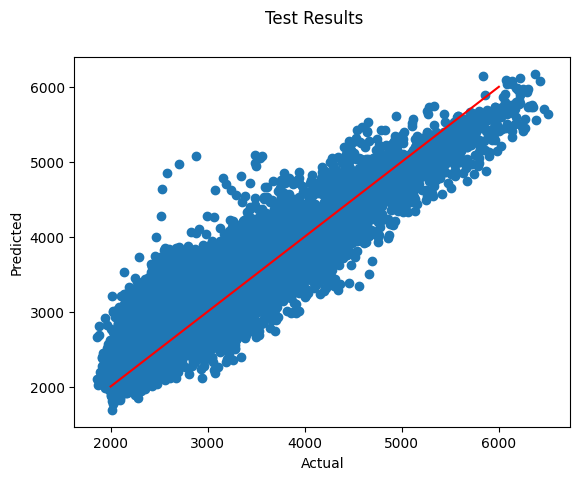

In [ ]:
# plotting actual vs. predicted demand values using model 02 for test data
actual = y_test # the actual
plt.scatter(x=actual, y=pred)
x = np.linspace(2000,6000) # 45 degree line
plt.plot(x, x, color='red')
plt.suptitle('Test Results')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

##### Timeseries Plot (Actual vs Predicted)

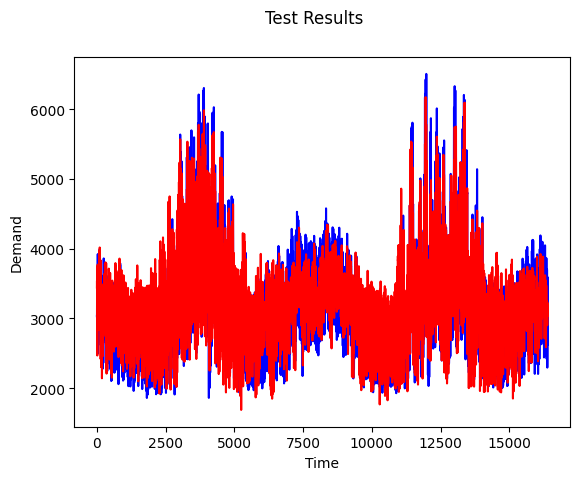

In [ ]:
# show timeseries plot on the train and validation data
plt.plot(np.arange(X_test.shape[0]), y_test, color='blue') # actual data
plt.plot(np.arange(X_test.shape[0]), pred, color='red') # predicted data
plt.suptitle('Test Results')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.show()